In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('..')

In [6]:
from PIL import Image, ImageEnhance, ImageMath, ImageFilter, ImageOps, ImageChops
from imutils import contours
from skimage import measure
import numpy as np
import imutils
import cv2

In [37]:
frame = Image.open('./data/raw/frames/dzik25fps_bw/frame_000123.png').convert('L')

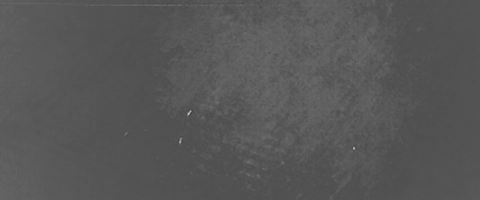

In [38]:
frame

In [43]:
contrast = ImageEnhance.Contrast(frame)


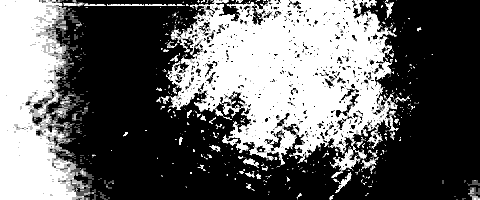

In [44]:
contrast.enhance(100)

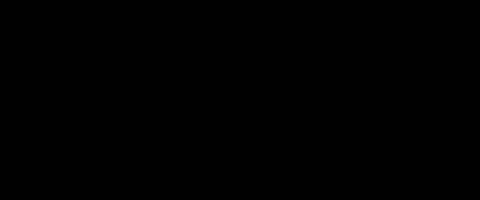

In [108]:
ImageMath.eval("a**-1", a=frame, b=contrast.enhance(1000))

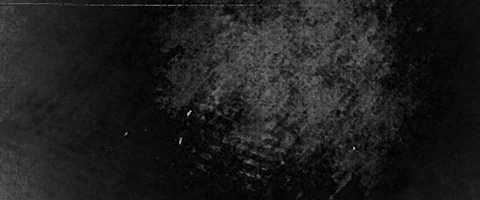

In [38]:
np.asarray(frame).shape

(200, 480, 3)

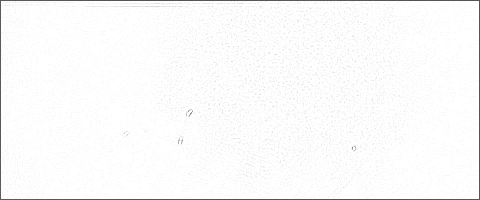

In [114]:
frame.filter(ImageFilter.CONTOUR)

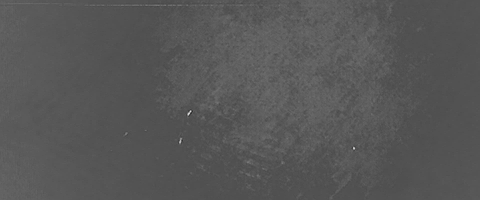

In [121]:
contrast.enhance(5).filter(ImageFilter.DETAIL)

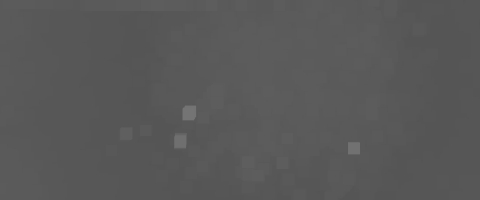

In [134]:
contrast.enhance(0.3).filter(ImageFilter.MaxFilter).filter(ImageFilter.MaxFilter).filter(ImageFilter.MaxFilter).filter(ImageFilter.MaxFilter).filter(ImageFilter.MaxFilter)

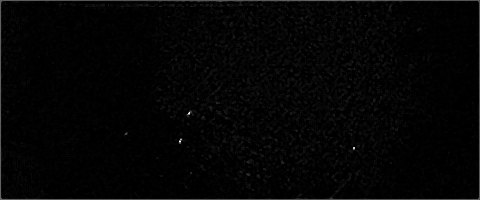

In [176]:
frame.filter(ImageFilter.FIND_EDGES).filter(ImageFilter.RankFilter(3,5))

In [177]:
enh = ImageEnhance.Contrast(frame.filter(ImageFilter.FIND_EDGES).filter(ImageFilter.RankFilter(3,5)))

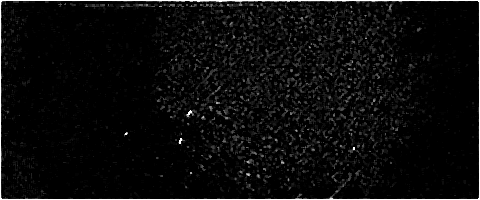

In [190]:
enh.enhance(5)

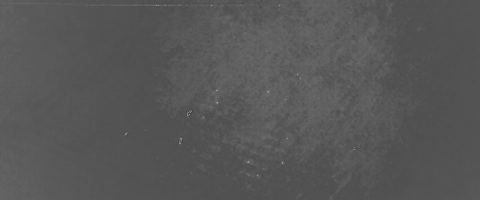

In [200]:
ImageOps.solarize(ImageOps.invert(frame), 150)

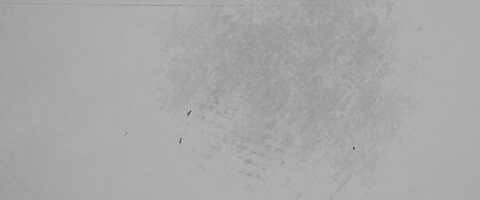

In [201]:
ImageOps.invert(frame).

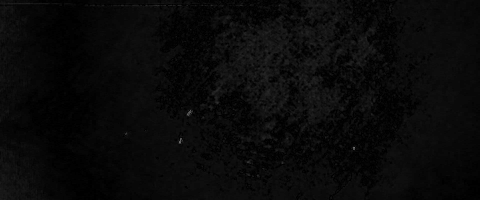

In [221]:
ImageChops.difference(frame, contrast.enhance(3))

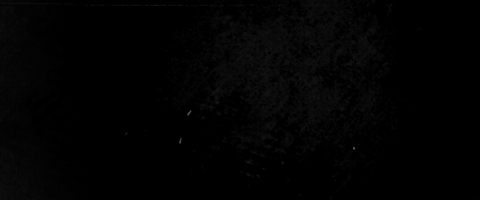

In [263]:
ImageChops.subtract(contrast.enhance(2), contrast.enhance(1))

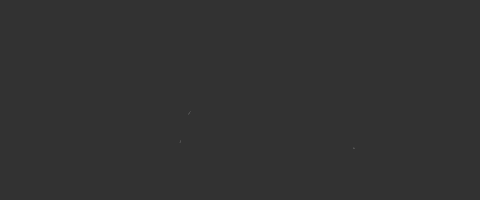

In [268]:
Image.fromarray(np.asarray(ImageChops.subtract(contrast.enhance(2), contrast.enhance(1))).clip(50))

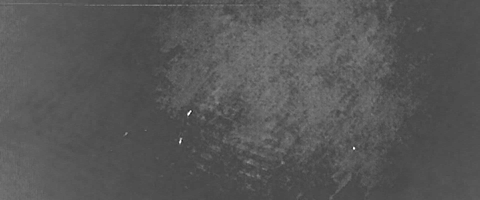

In [276]:
contrast.enhance(2)

In [279]:
np.asarray(contrast.enhance(2)).flatten()

array([101, 101,  99, ...,  89,  91,  91], dtype=uint8)

In [280]:
import seaborn as sns

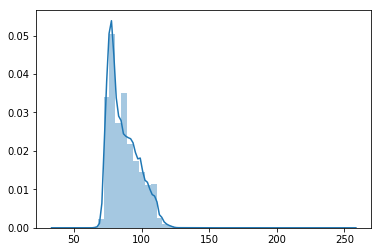

In [281]:
sns.distplot(np.asarray(contrast.enhance(2)).flatten())

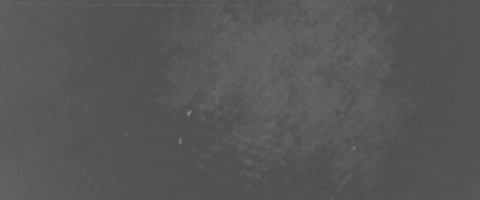

In [287]:
frame.filter(ImageFilter.GaussianBlur(1))

# "Blob" detection
https://www.pyimagesearch.com/2016/10/31/detecting-multiple-bright-spots-in-an-image-with-python-and-opencv/

In [5]:
image = cv2.imread('./data/raw/frames/dzik25fps_bw/frame_000123.png')
image = cv2.imread('./data/raw/frames/dzik25fps_bw/frame_003523.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#blurred = cv2.GaussianBlur(gray, (11, 11), 0)

In [6]:
thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)[1]

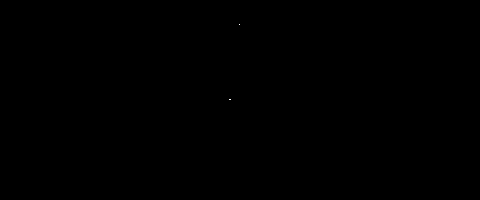

In [7]:
Image.fromarray(thresh)

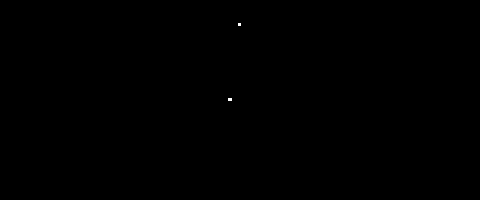

In [8]:
erode = cv2.dilate(thresh, None, iterations=2)
erode = cv2.erode(erode, None, iterations=1)
Image.fromarray(erode)
#thresh = cv2.dilate(thresh, None, iterations=4)

In [9]:
labels = measure.label(erode, neighbors=8, background=0)
mask = np.zeros(erode.shape, dtype="uint8")

In [10]:
for label in np.unique(labels):
    # if this is the background label, ignore it
    if label == 0:
        continue
 
    # otherwise, construct the label mask and count the
    # number of pixels 
    labelMask = np.zeros(erode.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
 
    # if the number of pixels in the component is sufficiently
    # large, then add it to our mask of "large blobs"
    if numPixels > 20:
        mask = cv2.add(mask, labelMask)

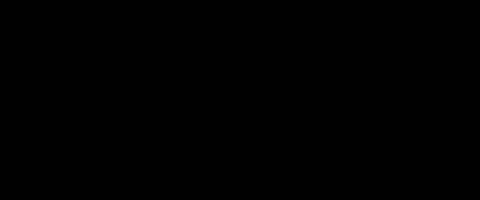

In [11]:
Image.fromarray(mask)

In [92]:
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = contours.sort_contours(cnts)[0]

In [93]:
# loop over the contours
rects = []
for (i, c) in enumerate(cnts):
    # draw the bright spot on the image
    (x, y, w, h) = cv2.boundingRect(c)
    rects.append((x,y,w,h))
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.rectangle(image, (x,y), (x+w,y+h), (0, 255,0))
    #cv2.circle(image, (int(cX), int(cY)), int(radius),
    #    (0, 0, 255), 3)
    #cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
        #cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

In [77]:
cv2.imshow("Image", image)
cv2.waitKey(0)

-1

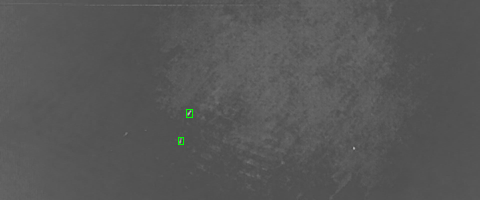

In [94]:
Image.fromarray(image)

In [60]:
cv

[(178, 137, 5, 7), (186, 109, 6, 8)]

In [78]:
cv2.resize(image, (1920, 900))

array([[[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       ...,

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89]]

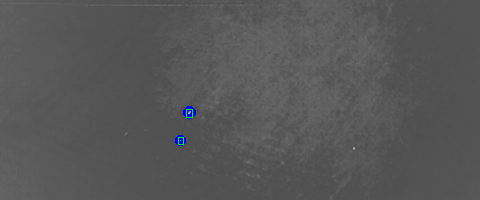

In [79]:
Image.fromarray(image)

In [4]:
from src.algorithms.cv2_detecting import detect_animals, draw_bboxes

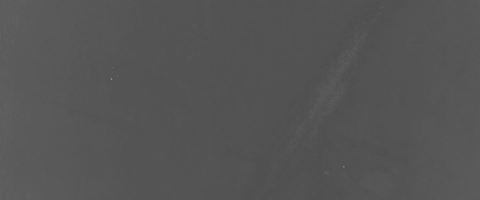

In [13]:
image = cv2.imread('./data/quadracopter_sample/frames/dzik25fps_bw_full/frame_002123.png')
Image.fromarray(image)

In [14]:
bboxes = detect_animals(image,5)

In [15]:
mbboxes

[(110, 77, 3, 4), (342, 165, 3, 3)]

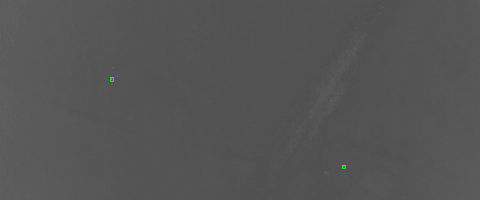

In [16]:
Image.fromarray(draw_bboxes(image, bboxes))

(200, 480, 3)